<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------

<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fff;">------------------
<span style="font-family: Arial; font-weight:bold;font-size:2.3em;color:#fa9200;">FIFA World Cup
    
 
    

Statistical Analysis by Adam M. Lang<br>
November 10, 2020

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Dataset Information:-

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is Germany, which won its fourth title at the 2014 tournament in Brazil.



The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.



<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Problem Statement:-
    
    

A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club you have been assigned a task to carry analysis on matches, players and world cup data. Here we need to analyse the countries which have won the world cup the most with attendance, goal and matches per cup based on cities. Also distribution of home and away goals. Whether playing on the home country is a factor for winning or not?

**Steps needs to be followed-**


* Total goals scored by year
* Total matches played and qualified teams by year
* Matches with highest number of attendance
* Cities that hosted highest world cup matches
* Average attendance by city
* Teams with the most world cup final victories
* World cup final results by nation
* Match outcomes by home and away teams








<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">Data Definition:-


**Year**: The year in which the match was played

**Datetime**: The Date on which the match was played along with a 24 hour format time

**Stage**: The stage at which the match was played

**Stadium**: Stadium name where the match was held

**City**: The city name, where the match was played

**Home Team Name**: Home team country name

**Home Team Goals**: Total goals scored by the home team by the end of the match

**Away Team Goals**: Total goals scored by the away team by the end of the match

**Away Team Name**: Away team country name

**Win conditions**: Special win condition (if any)

**Attendance**: Total crowd present at the satdium

**Half-time Home Goals**: Goals scored by the home team until half time

**Half-time Away Goals**: Goals scored by the away team until half time

**Referee**: Name of the first refree

**Assistant 1**: Name of the first assistant referee (linesman)

**Assistant 2**: Name of the second assistant referee (linesman)

**RoundID**: Unique ID of the Round


**MatchID**: Unique ID of the match

**Home Team Initials**: Home team country's three letter initials

**Away Team Initials**: Away team country's three lett




# Import Libraries

In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# Read the three datasets into notebook

In [2]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
cups = pd.read_csv('WorldCups.csv')

# Data Analysis and Preparation

1. Check Dimensions of the dataframe in terms of rows and columns<br>
2. Check data types. Ensure the data types are correct. Refer to data dictionary as needed.<br>
3. If data types are not as per business definition, then change as per requirements.<br>
4. Study summary statistics<br>
5. Check for missing values<br>
6. Study correlation<br>
7. Detect outliers

## Understanding the Dataset

In [3]:
#examine matches dataset
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
#examine players dataframe
players.head(7)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'


In [5]:
#examine cups dataframe
cups.tail(7)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [6]:
#display dimensions of cups dataframe
cups.shape

(20, 10)

We can see this is a small dataframe with 20 rows and 10 columns. 

In [7]:
#display dimensions of players dataframe
players.shape

(37784, 9)

There are significantly more rows at 37,784 with 9 columns. 

In [8]:
#display dimensions of the matches dataframe
matches.shape

(4572, 20)

There are 4,572 rows and 20 columns. 

### Data Types

In [9]:
#use info method, lets look at players df
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


We can see above that we have 3 integers and 6 objects (categorical) variables. 

In [10]:
#check dtypes for matches
matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

- The matches dataframe is interesting. It has only Floats (decimals) and Objects.<br>
- Right away we can see the **Datetime** variable is an object and not an actual time series data type.<br>
- We an also see that the **Year** variable is a float (decimal) and not a time series data type. This may need to be addressed later on in our analysis.<br>

In [11]:
#examine cups dataframe
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


- Again we can see the **Year** variable is listed as an integer and not a time series object.<br>
- Another interesting finding is that **Attendance** is an object and not a float or integer.<br>

### Summary Statistics

- We will examine the **mean, standard deviation, minimum value, maximum value, quartiles (1st percentile, 2nd percentile, 3rd percentile)** with numeric values. <br> 
- We will also examine the counts of the dataset.<br>
- The goal is to examine all **numeric** values of the dataset. 

In [12]:
#players dataset
players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [13]:
#matches dataset
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


Interesting findings of the matches dataset include:<br>
- The years start at 1930 and go through 2014.<br>
- The most home team goals scored was 10 and the most away team goals scored was 7.<br>
- Attendance maximum was 173,850 and a minimum of 2000. The mean attendance was about 45,200. 

In [14]:
#cups dataset
cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


Interesting findings from the cups dataset:<br>
- Maximum number of goals scored was 171<br>
- Minimum number of goals scored was 70<br>
- Average number of goals scored was about 119.<br>
- Average number of qualified teams was 21, with a maximum of 32 and a minimum of 13, but the standard deviation is 7.<br>
- Maximum number of matches played was 64, with a minimum of 17. The average number of matches played is 41.8.<br>
- We should keep in mind the sample size of this dataset is small with only a count of 20. 

What about categorical data?

In [15]:
#describe categorical data
cups.describe(include=object)

,Country,Winner,Runners-Up,Third,Fourth,Attendance
count,20,20,20,20,20,20
unique,15,9,10,14,16,20
top,France,Brazil,Argentina,Germany,Uruguay,1.865.753
freq,2,5,3,3,3,1


Now we can see some interesting information:<br>
- Brazil has won the World Cup 5 times which is the most ever.<br>
- A total of 9 different countries have won the World Cup.<br>
- Netherlands seems to be the top Runner-up having accomplished this 3 times.<br>

In [16]:
#players categorical data
players.describe(include=object)

,Team Initials,Coach Name,Line-up,Player Name,Position,Event
count,37784,37784,37784,37784,4143,9069
unique,82,335,2,7663,3,1893
top,BRA,SCOLARI Luiz Felipe (BRA),N,RONALDO,GK,OH46'
freq,2403,575,19040,33,2441,247


Interesting findings from this dataset include:<br>
- The team appearing the most is BRAZIL, a total of 2,403 times. 
- The coach of Brazil Scolari Luiz Felipe has appeared 575 times, the most ever.<br>
- Ronaldo is the player that has appeared the most playing 33 times.<br>
- There have been 7,663 unique/different players in the World Cup.

In [17]:
#matches categorical data
matches.describe(include=object)

,Datetime,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
count,852,852,852,852,852,852,852,852,852,852,852,852
unique,602,23,181,151,78,83,43,366,387,408,77,82
top,27 May 1934 - 16:30,Round of 16,Estadio Azteca,Mexico City,Brazil,Mexico,,Ravshan IRMATOV (UZB),HERMANS Peter (BEL),KOCHKAROV Bakhadyr (KGZ),BRA,MEX
freq,8,72,19,23,82,38,787,10,7,10,82,38


Interesting findings of this dataset:<br>
- Mexico City has hosted the most at 23 times.<br>
- Estadio Azteca has therefore seen the most games with 19.<br>
- Brazil has been the home team 82 times and Mexico has been the away team 38 times. 

### Missing Values

What can we do with missing values?<br>
- leave "as is"<br>
- drop them with dropna()<br>
- fill them with fillna()<br>
- fill them with test statistics such as mean or median<br>
<br>
- Missing values is a very common and troubling problem in data science.<br>
- We will now examine if there are any missing values in our datasets. 

In [18]:
#cups missing data
cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

There is NO missing data in the cups dataframe. 

In [19]:
#players missing data
players.isnull().sum().sum()

62356

In [20]:
players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Now we can see we have a problem with the Players dataframe because there are a total of 62,356 missing values coming from the **Position** and **Event** variables. 

In [21]:
#what percentage of missing values is this?
#write a function to determine this

def missing(x):
    print(round((x.isnull().sum() * 100 / len(x)),2).sort_values(ascending=False))
    
missing(players)

Position         89.04
Event            76.00
Player Name       0.00
Shirt Number      0.00
Line-up           0.00
Coach Name        0.00
Team Initials     0.00
MatchID           0.00
RoundID           0.00
dtype: float64


In [22]:
#Matches dataframe missing values?
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

There appear to be the same number of missing values in each column of the matches dataset. We may consider dropping these all together. 

### Mode Imputation for "Position" and "Event"

We would impute the missing values using the mode or most common value. 

In [23]:
#players dataset - first determine the value counts/variables that are available to impute
players['Position'].value_counts()

GK     2441
C      1510
GKC     192
Name: Position, dtype: int64

We will replace the **Position** and **Event** empty cells with NaN.

In [24]:
players['Position'].replace(' ',np.NaN).head(3)

0     GK
1     GK
2    NaN
Name: Position, dtype: object

In [25]:
df = players['Position'].value_counts().index[0]

In [26]:
players['Position'].fillna(df,inplace=True)
players['Position'].head()

0    GK
1    GK
2    GK
3    GK
4    GK
Name: Position, dtype: object

In [27]:
players['Event'].replace(' ',np.NaN).head(3)

0     NaN
1     NaN
2    G40'
Name: Event, dtype: object

In [28]:
df1 = players['Event'].value_counts().index[0]
players['Event'].fillna(df1,inplace=True)
players['Event'].head(2)

0    OH46'
1    OH46'
Name: Event, dtype: object

In [29]:
#repeat missing function to see if there is still missing info?

def missing(x):
    print(round((x.isnull().sum() * 100 / len(x)),2).sort_values(ascending=False))
    
missing(players)

Event            0.0
Position         0.0
Player Name      0.0
Shirt Number     0.0
Line-up          0.0
Coach Name       0.0
Team Initials    0.0
MatchID          0.0
RoundID          0.0
dtype: float64


### Mean and Median Imputation for Matches dataset

- Mean is a measure greatly affected by outliers or if the distribution of the data is not normally distributed. Therefore it is important to first check the distribution of the data before deciding to impute mean or median.<br>
- Mean imputation works best if the data is normally distributed or has a Gaussian distribution, while median imputation is preferable for skewed distributions (right or left). 

**Sometimes it is advisable to drop the columns when the NULL values are significantly more than the other values present.** 

### Correlation 

- Correlation allows us to see if there is a relationship between 2 variables.<br>
- A Positive correlation indicates the extent at which variables increase or decrease in parallel to on another.<br>
- A Negative correlation is one where a variable increases as the other decreases and vice versa.<br>
- Correlation among multiple values can be represented in the form of a matrix.

- Correlation takes a value between (+1) and (-1).<br>
- Correlation does not include strings only integer values. 

In [30]:
#cups data correlation
cups.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


Let's look at some of the correlations:<br>
- MatchesPlayed vs. GoalsScored correlation is 0.87 which is 87%. So as more matches are played more goals are scored.<br>
- MatchesPlayed vs. Year correlation is 0.97 which is 97%, thus indicating that more matches were played as the years went on.<br>
- MatchesPlayed vs. Qualified Teams is 0.949 which is about 95% so as more matches were played more teams qualified. 

Let's plot a correlation matrix. 

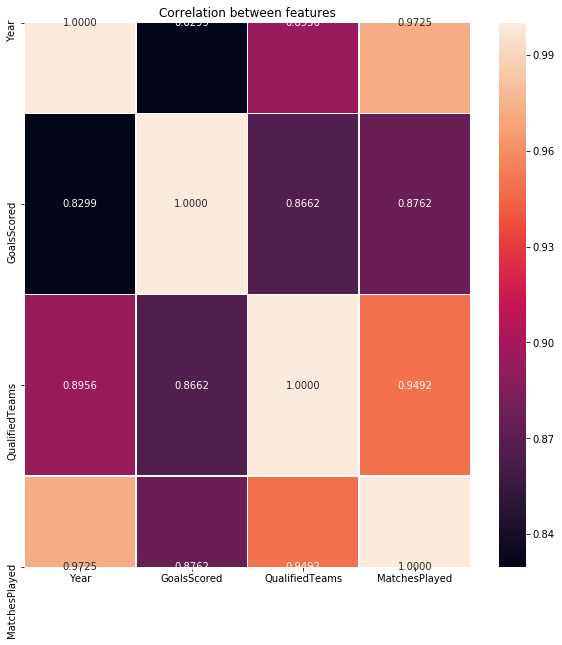

In [31]:
f,ax=plt.subplots(figsize=(10,10))

#plot heatmap
#corr: gives correlation matrix
#cmap: color code used for mapping
#vmax: gives max range of values for chart
#vmin: gives min range of values for chart
#annot: prints correlation numerical values in chart
#annot_kws={"size":12}: sets the font size of the notation

#make heatmap plot using seaborn
sns.heatmap(cups.corr(),annot=True,linewidths=.5, fmt= '.4f',ax=ax)
#name of plot
plt.title("Correlation between features")
plt.show()

### Discover Outliers with Visualization

Importance of detecting an outlier<br>

One of the most important tasks from large data sets is to find an outlier, which is defined as a sample or event that is very inconsistent with the rest of the data set. The observation point or value would be distant from the other observations in the data set.

outliers: the value that is considerably higher or lower from rest of the data<br>

Lets say value at 75% is Q3 and value at 25% is Q1.<br>
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR<br>

We will use describe() method. Describe method includes:<br>
- count: number of entries<br>
- mean: average of entries<br>
- std: standart deviation<br>
- min: minimum entry<br>
- 25%: first quantile<br>
- 50%: median or second quantile<br>
- 75%: third quantile<br>
- max: maximum entry<br>

What is quantile?<br>
- 1,4,5,6,8,9,11,12,13,14,15,16,17

- The median is the number that is in middle of the sequence. In this case it would be 11.<br>

- The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.<br>

- The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 * according to the question above.<br>

- If the sequence has an even number of elements, then median is equal to mean of the numbers beside median.<br>

i.e. Let's suppose 1,4,6,8 is our sequence. Median should be 2.5 between 4 and 6. Then median of this sequence is (4+6)/2 = 5.

#### Box Plot

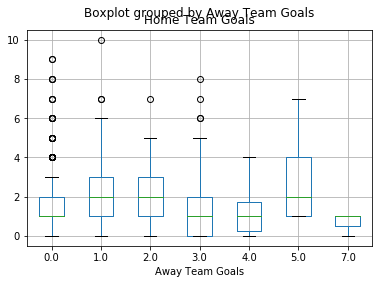

In [32]:
#matches box plot
matches.boxplot(column="Home Team Goals",by="Away Team Goals");

The analysis above shows that the Away team for example scored 0 goals when the home team scored 9 goals as seen on the far left of the graph.

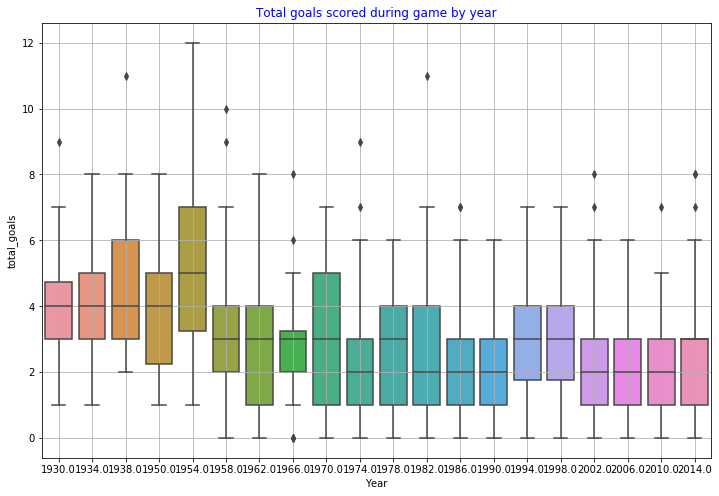

In [35]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]

plt.figure(figsize=(12,8))
sns.boxplot(y=matches["total_goals"],
           x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color="b")
plt.show()

- This visualization tells us that the number of goals scored per game is decreasing as the years go on. The median number of goals scored in 1954 was the most at 5, whereas we can see this number dropped to 2 in 2002-2010. The maximum number of goals scored also peaked in 1954 at 12.<br>
- What is interesting is that there are no outliers for the 12 goals scored in 1954 due to the nature of the high scoring games as seen by the quartiles in the box plot.<br>
- There are outliers seen for example in 1938 as it was a lower scoring year there was 1 outlier of 11 goals scored. 

Let's look at the quantiles. 

In [36]:
Q1 = matches.quantile(0.25)
Q3 = matches.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year                          32.0
Home Team Goals                2.0
Away Team Goals                2.0
Attendance                 31374.5
Half-time Home Goals           1.0
Half-time Away Goals           1.0
RoundID                   249460.0
MatchID                 43948870.5
total_goals                    3.0
dtype: float64


Identify an outlier 1.5 times the IQR.

In [37]:
matches = matches[~((matches < (Q1 - 1.5 * IQR)) | (matches > (Q3 + 1.5 * IQR))).any(axis=1)]

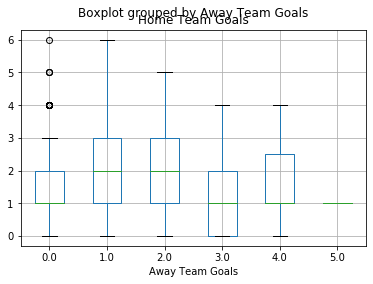

In [39]:
#now we plot this and the outliers will for the most part go away as we are looking for "inliers"
matches.boxplot(column="Home Team Goals", by="Away Team Goals");

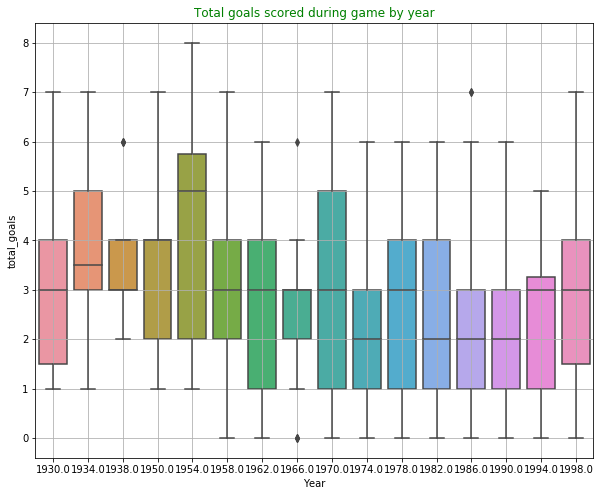

In [42]:
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]

plt.figure(figsize=(10,8))
sns.boxplot(y=matches["total_goals"],
            x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='g')
plt.show()

## Comparing Two Data Visualization Tools: Matplotlib vs. Seaborn

# Univariate Analysis

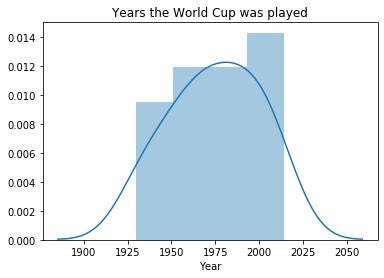

In [46]:
#examine distribution
sns.distplot(cups.Year);

#title
plt.title('Years the World Cup was played')
plt.show()

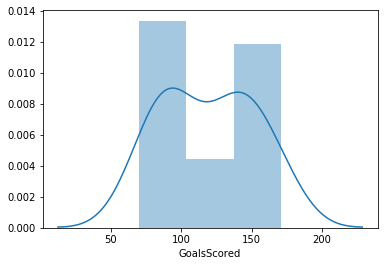

In [48]:
#lets look at goals scored
sns.distplot(cups.GoalsScored);

At first glance the distplot shows us that there appear to be 2 modes of the distribution of goals scored. Let's look further into this. 

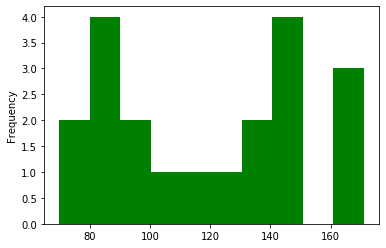

In [50]:
cups['GoalsScored'].plot(kind='hist',color='g')
plt.show()

- Looking at a true histogram of the GoalsScored variable we can see indeed there are 2 modes, actually 3 modes that stand out for number of goals scored.<br>
- This seems to fit with the earlier summary statistics as we saw that the distribution of the quantiles as seen below in the describe() function. 

In [51]:
cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


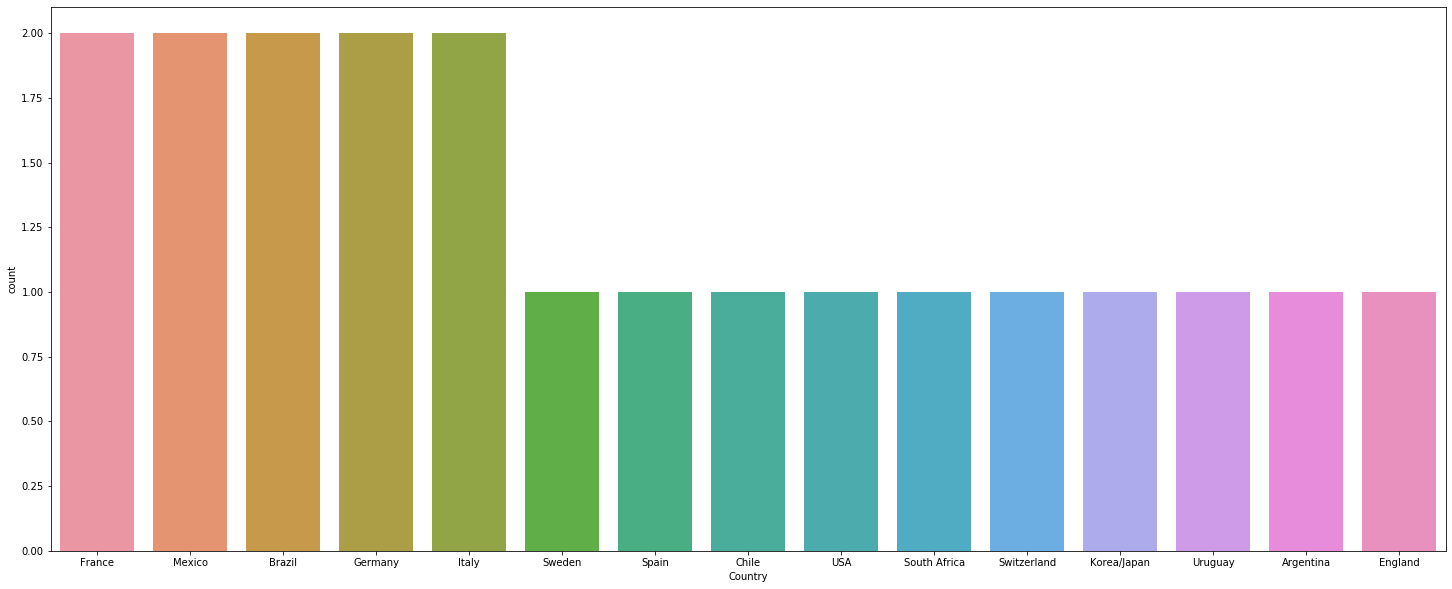

In [59]:
#lets look at a countplot
plt.figure(figsize=(25,10))
sns.countplot(cups.Country,order= cups.Country.value_counts().index);

plt.show()

France, Mexico, Brazil, Germany and Italy have hosted the most number of times (twice) whereas the rest of the countries hosted it once. 

## Bivariate Analysis

<Figure size 1008x1008 with 0 Axes>

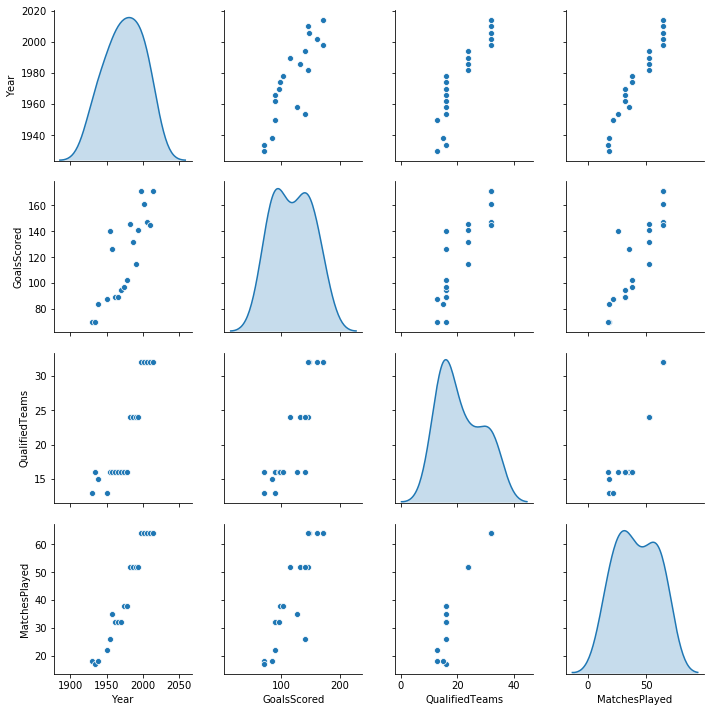

In [62]:
plt.figure(figsize=(14,14))

#seaborn plot
sns.pairplot(cups,diag_kind="kde");
plt.show()

Pairsplot gives relationship between variables. We can see for example there were more matches played as the years went up. 

**Scatter Plot**

We can isolate the variables and look closer at their correlations. 

In [64]:
cups["AverageGoal"] = cups.GoalsScored/cups.MatchesPlayed

No handles with labels found to put in legend.


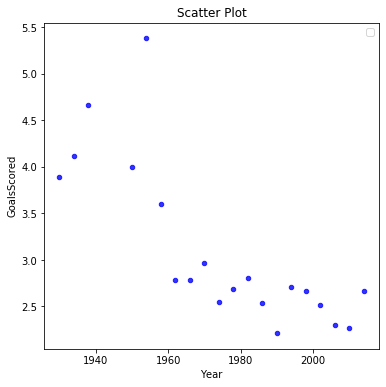

In [66]:
cups.plot(kind="scatter",x="Year",y="AverageGoal",alpha= .8, color="blue", figsize=(6,6))

plt.legend()
plt.xlabel('Year')
plt.ylabel('GoalsScored')
plt.title('Scatter Plot')

plt.show()

The scatter plot shows:<br>
- The most number of goals were scored in 1954.<br>
- The overall trend is less goals scored as the years went upward. 

**Line Plot**

- Now, it is easier to see the fact that although Year and GoalsScored variables are positively correlated, there is a negative correlation between Year and AverageGoal.<br>

- This contradiction shows us that as the years passed, teams have not began to score more goals in a single match.<br>

- Now it is easier to understand why GoalsScored has been increasing from 1930 so far. Let's prepare a line plot for different variables.

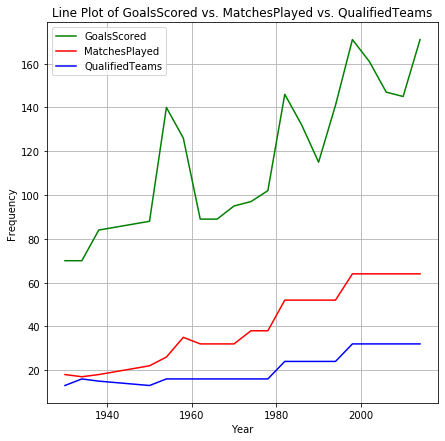

In [68]:
ax = plt.gca()

cups.plot(kind="line", x="Year",y="GoalsScored",color="green",ax=ax,grid=True,figsize=(7,7))
cups.plot(kind="line", x="Year",y="MatchesPlayed",color="red",ax=ax,grid=True)
cups.plot(kind="line", x="Year",y="QualifiedTeams",color="b",ax=ax,grid=True)

#legend
plt.legend(loc="upper left")
#title and labels
plt.title("Line Plot of GoalsScored vs. MatchesPlayed vs. QualifiedTeams")
plt.ylabel("Frequency")

#show plot
plt.show()

The plot shows that GoalsScored seems to go up as Matches and Qualified Teams go up. Although there have been some years where GoalsScored fluxuated and was less. 

## Multivariate Plotting

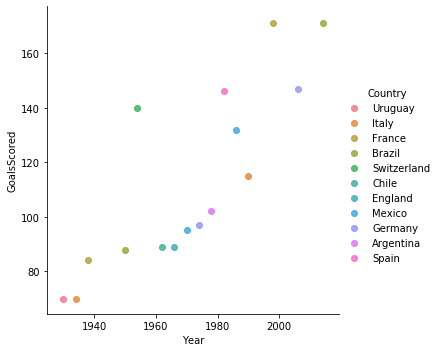

In [70]:
import seaborn as sns

sns.lmplot(x='Year', y='GoalsScored', hue='Country', 
           data=cups.loc[cups['Country'].isin(['Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain', 'Mexico'])], 
           fit_reg=False);

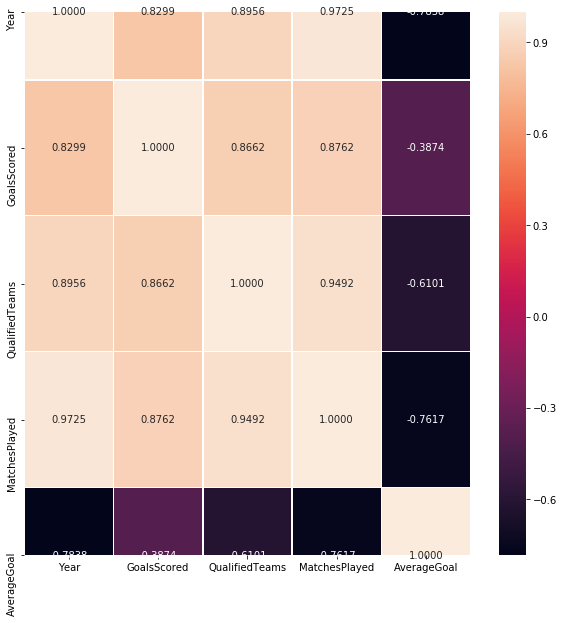

In [71]:
#heatmap
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cups.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
plt.show()

# Important Functions for Data Cleaning

## Filters

In [73]:
#filter for: number of goals scored > 100 but after 1930
cups[np.logical_and(cups['GoalsScored'] > 100, cups['Year'] > 1930)]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,3.600000
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791,2.684211
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723,2.807692
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031,2.538462
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215,2.211538
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538,2.711538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100,2.671875
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197,2.515625
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439,2.296875


## User defined functions

In [74]:
def cup(count=5):
    """returns a list of top (count) cups that finished with the highest amount of goals (default:5)"""
    ecg=cups.sort_values(by=['GoalsScored'],ascending=False).head(count)
    return ecg
cup()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810,2.671875
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100,2.671875
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197,2.515625
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439,2.296875
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723,2.807692


This function grouped the World Cups by top number of goals scored and we ca see that 171 goals scored occurred twice in 2014 and 1998. 

## Nested Functions

In [75]:
def goals(country=16):
    Country=cups.at[country-1,'Country']
    year=cups.at[country-1,'Year']
    goals=cups.at[country-1,'GoalsScored']
    matches=cups.at[country-1,'MatchesPlayed']
    def AvgGoal(goals, matches):
        avg=goals/matches
        return avg
    print(Country, year)
    print("Average goal per match:",AvgGoal(goals,matches))
goals()

France 1998
Average goal per match: 2.671875


## args vs. *kwargs

In [76]:
def ulkeler(*args):
    for i in args:
        print(i)
countries=tuple(cups.iloc[:, cups.columns.get_loc('Country')])
ulkeler(countries)

dict=cups.set_index('Country').to_dict()['Winner']
def f(**kwargs):
    for key, value in kwargs.items():
        print(key, " ", value)
    
f(**dict)

('Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden', 'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain', 'Mexico', 'Italy', 'USA', 'France', 'Korea/Japan', 'Germany', 'South Africa', 'Brazil')
Uruguay   Uruguay
Italy   Germany FR
France   France
Brazil   Germany
Switzerland   Germany FR
Sweden   Brazil
Chile   Brazil
England   England
Mexico   Argentina
Germany   Italy
Argentina   Argentina
Spain   Italy
USA   Brazil
Korea/Japan   Brazil
South Africa   Spain


Here we can see the Country that hosted on the left and the Winning Country on the right. 

### cleaning the data and making it more workable

In [77]:
cups.Attendance = cups.Attendance.astype(str)
cups.Attendance = [c.replace('.', '') for c in cups.Attendance]
cups.Attendance = cups.Attendance.astype(int)

### removing spaces and hyphens

In [78]:
matches.columns = [c.replace(' ', '') for c in matches.columns]
matches.columns = [c.replace('-','') for c in matches.columns]
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'HomeTeamName',
       'HomeTeamGoals', 'AwayTeamGoals', 'AwayTeamName', 'Winconditions',
       'Attendance', 'HalftimeHomeGoals', 'HalftimeAwayGoals', 'Referee',
       'Assistant1', 'Assistant2', 'RoundID', 'MatchID', 'HomeTeamInitials',
       'AwayTeamInitials', 'total_goals'],
      dtype='object')

### multi-index

In [79]:
#make copy
cups_data1 = cups.copy()

In [80]:
cups_data1.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647


In [81]:
cups_data = cups_data1.set_index(["Country","Winner"])
cups_data.head(4)

,,Year,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal
Country,Winner,,,,,,,,,
Uruguay,Uruguay,1930,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
Italy,Italy,1934,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
France,Italy,1938,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
Brazil,Uruguay,1950,Brazil,Sweden,Spain,88,13,22,1045246,4.000000


The index has now changed to the country rather than the number. 

### Transforming Data and List Comprehension

In [82]:
cups_data1["GoalMean"] = [round(cups_data1.GoalsScored[i]/cups_data1.MatchesPlayed[i],2) for i in range(len(cups_data1.GoalsScored))]
cups_data1.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal,GoalMean
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667,4.67
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000,4.00
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615,5.38


### Index Object

In [83]:
print(cups_data1.index.name)
cups_data1.index.name="IndexName"
cups_data1.head(3)

None


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal,GoalMean
IndexName,,,,,,,,,,,,
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667,4.67


### Setting index : type 1 is outer type 2 is inner index:

In [84]:
cups_data2 = cups_data1.set_index(["Winner","Year"]) 
cups_data2.head(3)

Country      Runners-Up    Third      Fourth  GoalsScored  \
Winner  Year                                                              
Uruguay 1930  Uruguay       Argentina      USA  Yugoslavia           70   
Italy   1934    Italy  Czechoslovakia  Germany     Austria           70   
        1938   France         Hungary   Brazil      Sweden           84   

              QualifiedTeams  MatchesPlayed  Attendance  AverageGoal  GoalMean  
Winner  Year                                                                    
Uruguay 1930              13             18      590549     3.888889      3.89  
Italy   1934              16             17      363000     4.117647      4.12  
        1938              15             18      375700     4.666667      4.67

In [85]:
cups_data3=cups_data1.set_index(["Winner","GoalMean"])
cups_data3.head()

Year      Country      Runners-Up    Third      Fourth  \
Winner     GoalMean                                                           
Uruguay    3.89      1930      Uruguay       Argentina      USA  Yugoslavia   
Italy      4.12      1934        Italy  Czechoslovakia  Germany     Austria   
           4.67      1938       France         Hungary   Brazil      Sweden   
Uruguay    4.00      1950       Brazil          Brazil   Sweden       Spain   
Germany FR 5.38      1954  Switzerland         Hungary  Austria     Uruguay   

                     GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
Winner     GoalMean                                                           
Uruguay    3.89               70              13             18      590549   
Italy      4.12               70              16             17      363000   
           4.67               84              15             18      375700   
Uruguay    4.00               88              13             22     1045246   
Germany FR 5.38              140              16             26      768607   

                     AverageGoal  
Winner     GoalMean               
Uruguay    3.89         3.888889  
Italy      4.12         4.117647  
           4.67         4.666667  
Uruguay    4.00         4.000000  
Germany FR 5.38         5.384615

### Groupby

In [86]:
cups_data3.groupby("GoalsScored").mean().head()

,Year,QualifiedTeams,MatchesPlayed,Attendance,AverageGoal
GoalsScored,,,,,
70,1932.0,14.5,17.5,476774.5,4.003268
84,1938.0,15.0,18.0,375700.0,4.666667
88,1950.0,13.0,22.0,1045246.0,4.000000
89,1964.0,16.0,32.0,1228153.5,2.781250
95,1970.0,16.0,32.0,1603975.0,2.968750


# Original Problem Statement

**Problem Statement**<br>
<br>
A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club you have been assigned a task to carry analysis on matches, players and world cup data.<br>
<br>
- Here we need to analyse the countries which have won the world cup the most with attendance, goal and matches per cup based on cities.<br>
- Also analyze the distribution of home and away goals. Whether playing on the home country is a factor for winning or not?

## Total goals scored by year

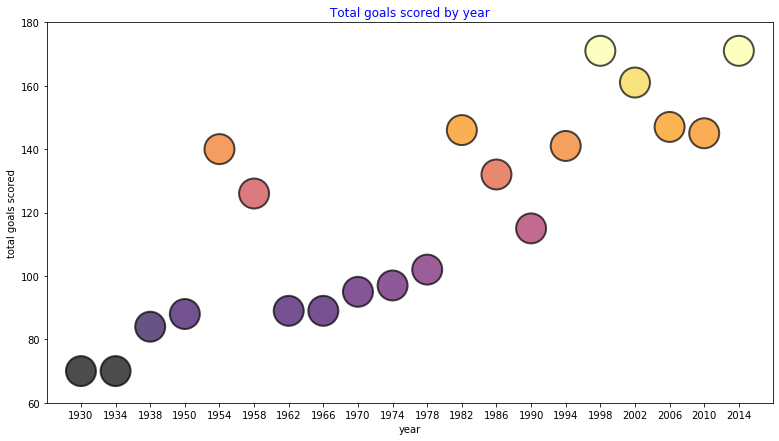

In [87]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

The plot shows the number of goals scored went up gradually but not in an even manner. 

## Total matches played and qualified teams by year

- In the tournaments between 1934 and 1978, 16 teams competed in each tournament, except in 1938, when Austria was absorbed into Germany after qualifying, leaving the tournament with 15 teams, and in 1950, when India, Scotland, and Turkey withdrew, leaving the tournament with 13 teams.<br>

- The tournament was expanded to 24 teams in 1982, and then to 32 in 1998,also allowing more teams from Africa, Asia and North America to take part.

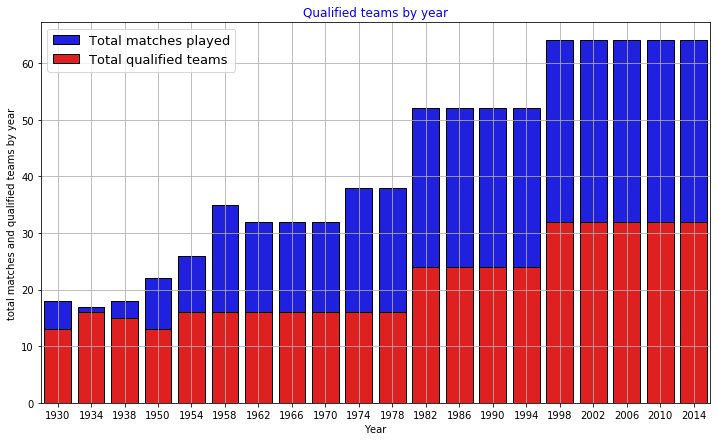

In [88]:
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,
            edgecolor="k"*len(cups),color="b",label="Total matches played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
            edgecolor="k"*len(cups),color="r",label="Total qualified teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

Analysis:<br>
1. Initially more teams qualified than matches were played.<br>
2. Eventually it evened out for number of matches played to number of teams qualified and grew more steadily each year. 

## Matches with highest number of attendance

In [89]:
#dropna's first
matches.dropna().head(2)

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,...,HalftimeHomeGoals,HalftimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials,total_goals
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0


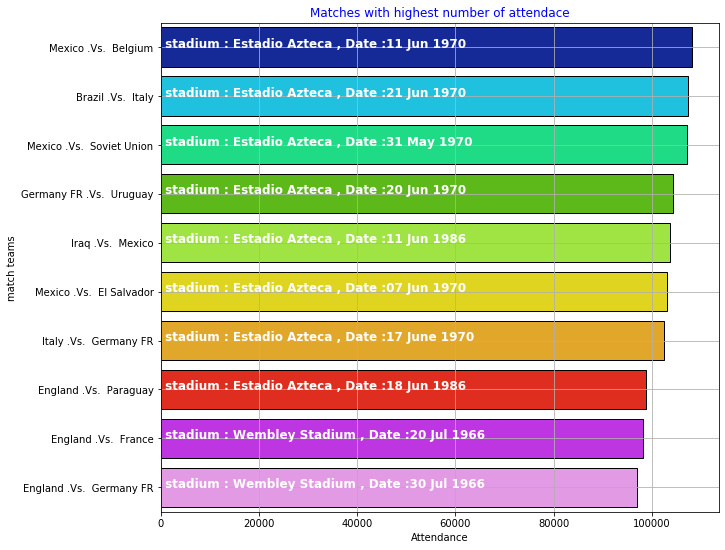

In [90]:
h_att = matches.sort_values(by="Attendance",ascending=False)[:10]
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'HomeTeamName',
              'HomeTeamGoals', 'AwayTeamGoals', 'AwayTeamName', 'Attendance', 'MatchID']]
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
h_att["mt"] = h_att["HomeTeamName"] + " .Vs.  " + h_att["AwayTeamName"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

Analysis: It appears the top 8 stadiums and matches with highest attendance was at Estadio Azteca. 

## Cities that hosted highest world cup matches

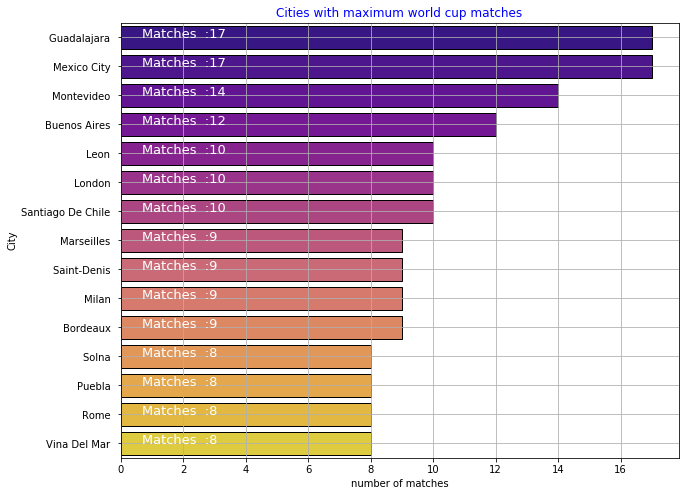

In [91]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

Analysis: Guadalajara and Mexico City have hosted the most number of matches. 

## Average Attendance by City

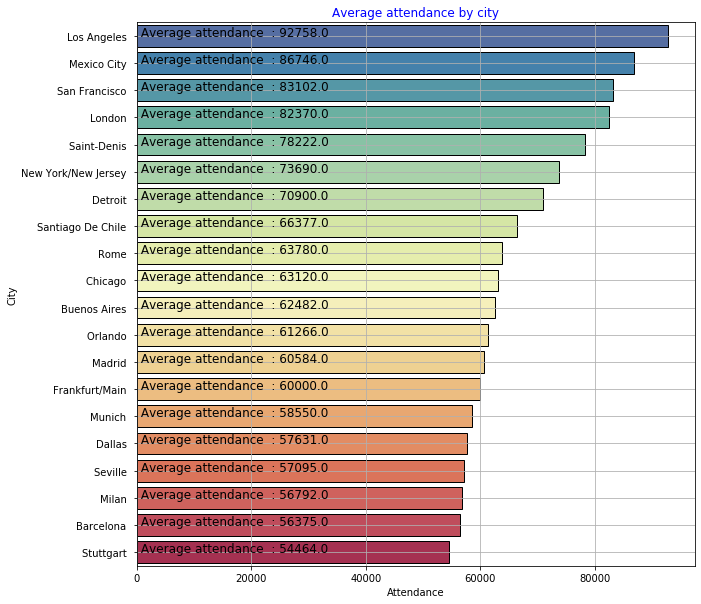

In [92]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()

Analysis: Los Angeles and Mexico City have the top 2 highest attendances on average. 

## Teams with the most World Cup Victories

The 20 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina and inaugural winner Uruguay, with two titles each; and England, France, and Spain, with one title each.

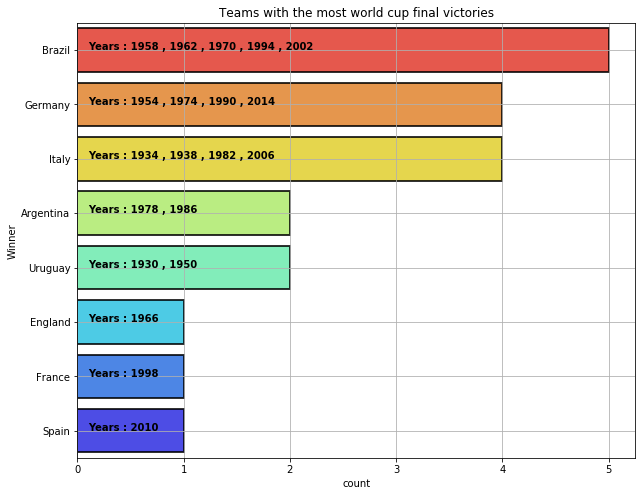

In [93]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

Analysis: Brazil is the team with the most World Cup victories in 1958, 1962, 1970, 1994 and 2002. 

## World Cup final results by nation

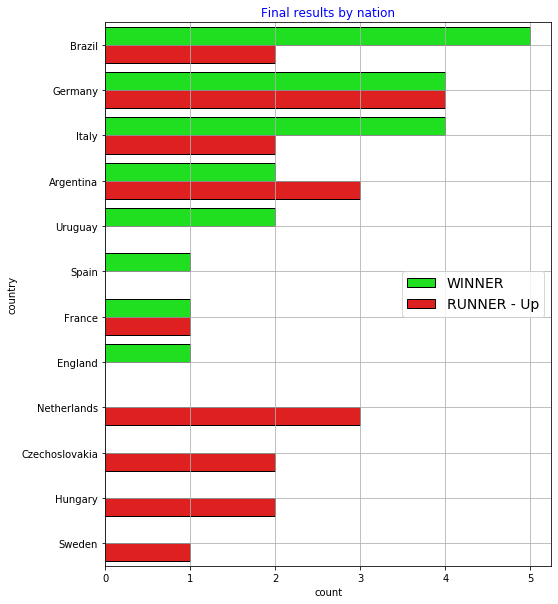

In [94]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

Analysis:<br>
- Brazil has won the most a total of 5 times.<br>
- Netherlands, Czechoslovakia, Hungary, and Sweden have never won. 

## Match outcomes by home teams and away teams

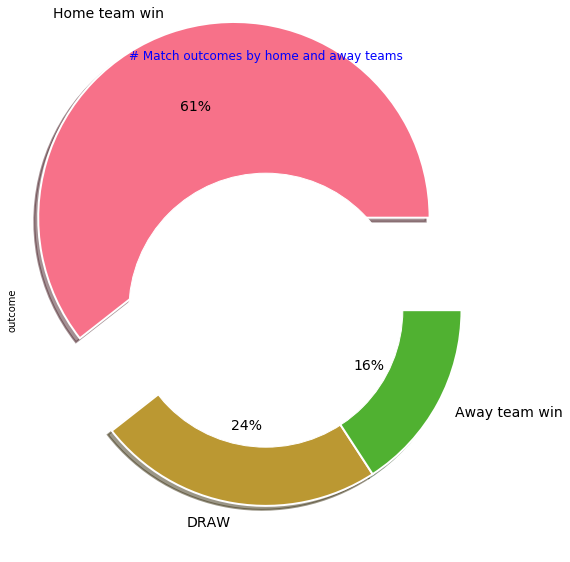

In [98]:
def label(matches):
    if matches["HomeTeamGoals"] > matches["AwayTeamGoals"]:
        return "Home team win"
    if matches["AwayTeamGoals"] > matches["HomeTeamGoals"]:
        return "Away team win"
    if matches["HomeTeamGoals"] == matches["AwayTeamGoals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True,explode=[0.5,0,0])
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

Analysis: The home team wins 61% of the time!

# Conclusions:<br>

- The home team wins 61% of the time<br>.
- Brazil has won the most number of times (5).<br>
- Los Angeles and Mexico City have the highest attendances on record.<br>
- Goals Scored has a negative correlation with Years. The more the Years went on the less goals were scored. 1954 had the most number of goals scored.<br>
- Goals Scored however had a positive correlation with Matches Played and Qualified Teams, as both went up so did the number of Goals Scored although not evenly.